In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection
import sklearn.metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
import sklearn.linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [2]:
data = np.loadtxt('reprocessed.hungarian.data')
Param = data[:,:-1]
Muerte = np.int_(data[:,-1])
Muerte[Muerte!=0]=1

In [3]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(Param, Muerte, test_size=0.5)

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few est

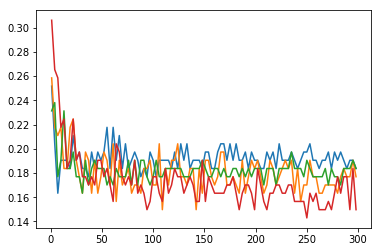

In [4]:
error=[]
error1=[]
oob=[]
oob1=[]
arboles=[]
for i in range(1,300,3):
    arbol = BaggingClassifier(n_estimators=i,oob_score=True)
    arbol.fit(X_train,Y_train)
    B=arbol.predict(X_validation)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(B,Y_validation, labels=None, sample_weight=None).ravel()
    error.append((tp+tn)/(tn+fp+fn+tp))
    oob.append(1-arbol.oob_score_)
    arbol = RandomForestClassifier(n_estimators=i,oob_score=True)
    arbol.fit(X_train,Y_train)
    B=arbol.predict(X_validation)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(B,Y_validation, labels=None, sample_weight=None).ravel()
    error1.append((tp+tn)/(tn+fp+fn+tp))
    oob1.append(1-arbol.oob_score_)
    arboles.append(i)
plt.plot(arboles,1-np.array(error))
plt.plot(arboles,np.array(oob))
plt.plot(arboles,1-np.array(error1))
plt.plot(arboles,np.array(oob1))

In [21]:
data = pd.read_csv('OJ.csv')
Purchase = data['Purchase']
Param = data.loc[:, data.columns != 'Purchase']
Param = Param.loc[:, Param.columns != 'Store7']
Param = Param.loc[:, Param.columns != 'Unnamed: 0']
#Purchase[Purchase=="CH"]=1
#Purchase[Purchase=="MM"]=0

In [22]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(Param, Purchase, test_size=0.5)

In [25]:
error=[]
error1=[]
error2=[]
arboles=[]
P=np.size(np.array(Param)[0,:])
for i in range(1,300,3):
    arbol = RandomForestClassifier(n_estimators=i,max_features=P)
    arbol.fit(X_train,Y_train)
    B=arbol.predict(X_validation)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(B,Y_validation, labels=None, sample_weight=None).ravel()
    error.append((tp+tn)/(tn+fp+fn+tp))
    arbol = RandomForestClassifier(n_estimators=i,max_features=int(P/2))
    arbol.fit(X_train,Y_train)
    B=arbol.predict(X_validation)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(B,Y_validation, labels=None, sample_weight=None).ravel()
    error1.append((tp+tn)/(tn+fp+fn+tp))
    arbol = RandomForestClassifier(n_estimators=i,max_features=int(np.sqrt(P)))
    arbol.fit(X_train,Y_train)
    B=arbol.predict(X_validation)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(B,Y_validation, labels=None, sample_weight=None).ravel()
    error2.append((tp+tn)/(tn+fp+fn+tp))
    arboles.append(i)

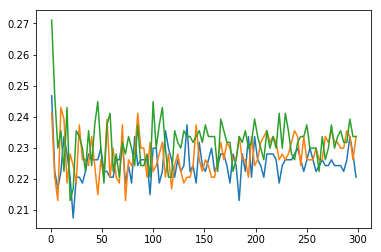

In [26]:
plt.plot(arboles,1-np.array(error))
plt.plot(arboles,1-np.array(error1))
plt.plot(arboles,1-np.array(error2))

In [27]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(Param, Purchase, test_size=0.5)

In [58]:
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear")
logistic.fit(Param, Purchase)
logistic_CH = logistic.predict_proba(X_validation)[:,0]

lda = LinearDiscriminantAnalysis()
lda.fit(Param, Purchase)
lda_CH = lda.predict_proba(X_validation)[:,0]

arbol = BaggingClassifier()
arbol.fit(X_train,Y_train)
arbol_CH = arbol.predict_proba(X_validation)[:,0]

selva = RandomForestClassifier()
selva.fit(X_train,Y_train)
selva_CH = selva.predict_proba(X_validation)[:,0]
selva.classes_

/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['CH', 'MM'], dtype=object)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


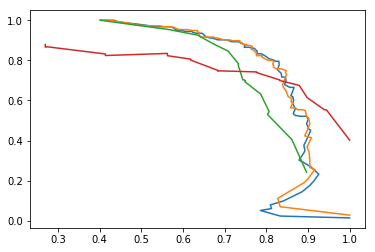

In [73]:
P=[]
R=[]
for i in range(101):
    A = Y_validation.copy()
    ii = logistic_CH>(i/100.)
    A[ii] = 'CH'
    A[~ii] = 'MM'
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(A,Y_validation).ravel()
    P.append(tp/(tp + fp))
    R.append(tp/(tp + fn))
plt.plot(R,P)
P=[]
R=[]
for i in range(101):
    A = Y_validation.copy()
    ii = lda_CH>(i/100.)
    A[ii] = 'CH'
    A[~ii] = 'MM'
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(A,Y_validation).ravel()
    P.append(tp/(tp + fp))
    R.append(tp/(tp + fn))
plt.plot(R,P)
P=[]
R=[]
for i in range(101):
    A = Y_validation.copy()
    ii = arbol_CH>(i/100.)
    A[ii] = 'CH'
    A[~ii] = 'MM'
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(A,Y_validation).ravel()
    P.append(tp/(tp + fp))
    R.append(tp/(tp + fn))
plt.plot(R,P)
P=[]
R=[]
for i in range(101):
    A = Y_validation.copy()
    ii = selva_CH>(i/100.)
    A[ii] = 'CH'
    A[~ii] = 'MM'
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(A,Y_validation).ravel()
    P.append(tp/(tp + fp))
    R.append(tp/(tp + fn))
plt.plot(P,R)